In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Inspect table and table columns

In [10]:
#use inspector to examine table info
from sqlalchemy import inspect
inspector = inspect(engine)

In [11]:
inspector.get_table_names()

['measurement', 'station']

In [12]:
measurementCols = inspector.get_columns('measurement')
for col in measurementCols:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
stationCols = inspector.get_columns('station')
for col in stationCols:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'Lastest date captured in the dataset is: {latest_date}.')

Lastest date captured in the dataset is: ('2017-08-23',).


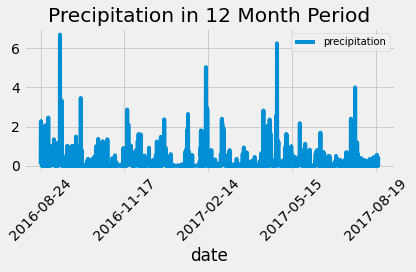

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date <= '2017-08-23')\
    .filter(Measurement.date >= '2016-08-24').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data_df = pd.DataFrame(prcp_data).set_index('date')
prcp_data_df = prcp_data_df.rename(columns={'prcp':'precipitation'})


# Sort the dataframe by date
prcp_data_df = prcp_data_df.sort_values(by='date').dropna()
prcp_data_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

prcp_data_df.plot(title = 'Precipitation in 12 Month Period', rot=45)
plt.savefig('images/precipitation.png')
plt.legend(loc=0, prop={'size':10})
plt.tight_layout()
plt.show()


In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
print(f'There are a total of {station_count} stations in the dataset.')

There are a total of 9 stations in the dataset.


In [37]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()
print('Most Active Stations')
print('====================')
most_active_stations

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = 'USC00519281'
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station == station).all()

[(54.0, 85.0, 71.66378066378067)]

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_prcp_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date <= '2017-08-23')\
    .filter(Measurement.date >= '2016-08-24')\
    .filter(Measurement.station == station).all()
station_prcp_data

# get df for charting
station_prcp_data_df = pd.DataFrame(station_prcp_data).set_index('date')
station_prcp_data_df = station_prcp_data_df.rename(columns={'prcp':'precipitation'})
station_prcp_data_df.head()

,precipitation
date,
2016-08-24,2.15
2016-08-25,0.06
2016-08-26,0.01
2016-08-27,0.12
2016-08-28,0.60


# Close session

In [ ]:
# Close Session
session.close()